# Measure task complexity

without skill network instead based on skill count

In [46]:
import numpy as np
import ast
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objects as go
%matplotlib inline

## Load data

In [47]:
df = pd.read_json("full_data.json")

### Function to count unique skills in column of skills

In [48]:
# Collect all unique skills in a list

def skill_unique_count(df):
    
    list_of_skills = []

    for index, row in df.skills.iteritems():

        if  isinstance(row,list):

            for skill in row:
                if skill not in list_of_skills:
                    list_of_skills.append(skill)
                    #print("success", skill, len(list_of_skills))
                else:
                    pass

        if  isinstance(row,str):

            if row not in list_of_skills:
                    list_of_skills.append(row)
                    #print("success", row, len(list_of_skills))
            else:
                    pass
        else:
            #print(row, type(row))
            pass
        
    print('There', len(list_of_skills),'unique skills.')
    
    return list_of_skills

### How many unique skills overall?

In [49]:
skill_list = skill_unique_count(df)

There 6930 unique skills.


### How many unique skills per year? Time trend?

In [50]:
years = [2016,2017,2018,2019]

In [51]:
df["date_3"] = pd.to_datetime(df.date_2)

In [52]:
year_dict = {}

for year in years:
    
    unique_skills = skill_unique_count(df[df['date_3'].dt.year == year])
    
    num_projects = df[df['date_3'].dt.year == year].shape[0]
    
    year_dict[year] = [len(unique_skills),num_projects]

There 2407 unique skills.
There 3613 unique skills.
There 4539 unique skills.
There 6178 unique skills.


In [53]:
for i in year_dict:
    print(i,"- {} unique skills ({} pojects).".format(year_dict[i][0], year_dict[i][1]))

2016 - 2407 unique skills (43498 pojects).
2017 - 3613 unique skills (263688 pojects).
2018 - 4539 unique skills (163781 pojects).
2019 - 6178 unique skills (277816 pojects).


### How many skills has each project?

In [62]:
df["skill_count"] = 0

In [63]:
for index, row in df.skills.iteritems():
    
        if  isinstance(row,list):
        
            df["skill_count"][index] = len(row)
            #print(len(row))
            #print(df["skill_count"][index])
        
        if  isinstance(row,str):

            df["skill_count"][index] = 1    
            
        #else:
        
           # df["skill_count"][index] = 0

/Users/oleteutloff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/oleteutloff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



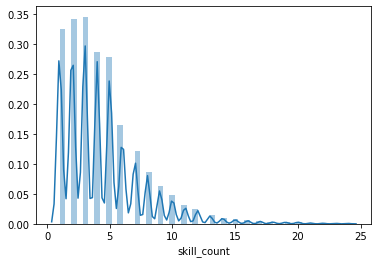

In [64]:
# distribution
#sns.distplot(df.skill_count)

# distribution without outliers
sns.distplot(df[df['skill_count'] < 25].skill_count)

In [65]:
# Extreme value with 121 skills
df[df['skill_count'] > 100]
#len(df["skills"][32224])

,skills,rate,category_1,category_2,date_2,SkillScore,skill_level,adj_rate,date_3,skill_count
23515,"[agl, amazon-web-services, android, android-ap...",35.5,"Web, Mobile & Software Dev",Mobile Development,2019-08-28,62.342857,medium,33.9,2019-08-28,121
40247,"[adobe-photoshop, agl, amazon-web-services, an...",42.5,"Web, Mobile & Software Dev",Mobile Development,2019-09-18,62.342857,medium,40.6,2019-09-18,106
185933,"[agl, amazon-web-services, android, android-ap...",32.5,"Web, Mobile & Software Dev",Mobile Development,2019-07-22,62.342857,medium,31.1,2019-07-22,121
228823,"[agl, amazon-web-services, android, android-ap...",49.0,"Web, Mobile & Software Dev",Mobile Development,2019-06-10,62.342857,medium,46.8,2019-06-10,103
290660,"[agl, amazon-web-services, android, android-ap...",31.5,"Web, Mobile & Software Dev",Mobile Development,2019-04-03,62.342857,medium,30.1,2019-04-03,103


In [66]:
df["skill_count"].describe()

count    748783.000000
mean          4.525157
std           3.483929
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max         121.000000
Name: skill_count, dtype: float64

### What is the mean number of skills in each skill level? 

In [80]:
num_skill = df.groupby(['skill_level'],as_index=False) \
       .agg({'date_2':'size',"skill_count":"mean","adj_rate":"median"})
num_skill.sort_values(by='skill_count',ascending=False)

,skill_level,date_2,skill_count,adj_rate
1,low,124604,4.741934,20.5
0,high,302932,4.532757,30.1
2,medium,225879,4.515382,29.6


### What is the mean number of skills in each job category? 

In [100]:
num_skill = df.groupby(['category_1'],as_index=False) \
       .agg({'date_2':'size',"skill_count":"mean","rate":"median"})
num_skill.sort_values(by='skill_count',ascending=False)

,category_1,date_2,skill_count,rate
2,Customer Service,13095,5.743948,16.5
8,Sales & Marketing,124417,4.992228,29.0
1,Admin Support,71147,4.917242,16.5
0,Accounting & Consulting,19407,4.779255,35.0
10,"Web, Mobile & Software Dev",237810,4.588865,30.0
11,Writing,66344,4.473607,32.0
4,Design & Creative,115262,4.343582,30.0
5,Engineering & Architecture,21304,3.883261,34.0
3,Data Science & Analytics,23111,3.613388,37.5
6,IT & Networking,27458,3.589154,42.0


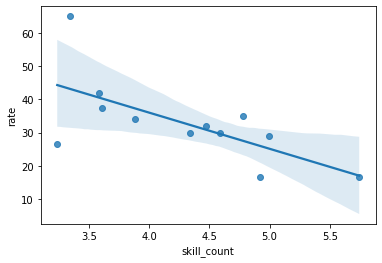

In [20]:
# How does this relate to wages? 
ax = sns.regplot(x="skill_count", y="rate", data=num_skill)

### How many unique skills are there in each skill category?

In [71]:
category_dict = {}

for category in df.skill_level.unique():
    
    unique_skills = skill_unique_count(df[df['skill_level'] == category])
    
    num_projects = df[df['skill_level'] == category].shape[0]
    
    category_dict[category] = [len(unique_skills),num_projects]

There 5519 unique skills.
There 4180 unique skills.
There 5181 unique skills.
There 0 unique skills.


In [86]:
unique_skill_cat = pd.DataFrame.from_dict(category_dict,orient='index',columns=['unique_skills', 'num_projects']
                                         ).sort_values(by='unique_skills',ascending=False)
unique_skill_cat

,unique_skills,num_projects
high,5519,302932
medium,5181,225879
low,4180,124604
NaN,0,0


### How many unique skills are there in each job category?

In [94]:
category_dict = {}

for category in df.category_1.unique():
    
    unique_skills = skill_unique_count(df[df['category_1'] == category])
    
    num_projects = df[df['category_1'] == category].shape[0]
    
    category_dict[category] = [len(unique_skills),num_projects]

There 4534 unique skills.
There 2833 unique skills.
There 3146 unique skills.
There 1998 unique skills.
There 3120 unique skills.
There 1471 unique skills.
There 2961 unique skills.
There 2282 unique skills.
There 2503 unique skills.
There 3020 unique skills.
There 1716 unique skills.
There 1099 unique skills.


In [99]:
unique_skill_cat = pd.DataFrame.from_dict(category_dict,orient='index',columns=['unique_skills', 'num_projects']
                                         ).sort_values(by='unique_skills',ascending=False)
unique_skill_cat

,unique_skills,num_projects
"Web, Mobile & Software Dev",4534,237810
Admin Support,3146,71147
Design & Creative,3120,115262
IT & Networking,3020,27458
Sales & Marketing,2961,124417
Writing,2833,66344
Data Science & Analytics,2503,23111
Engineering & Architecture,2282,21304
Accounting & Consulting,1998,19407
Customer Service,1716,13095


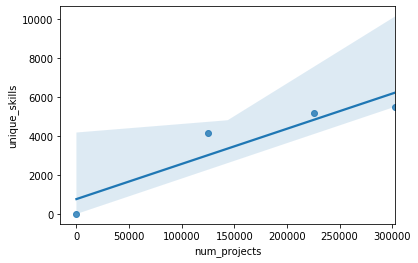

In [74]:
# More unique skills with increasing number of projects in a job category?
sns.regplot(x="num_projects", y="unique_skills", data=unique_skill_cat)

### What is the mean number of skills in each skill level? 
(**normalized** by number of unique skills in the respective category)

In [87]:
# Rearrange unique_skill_cat
unique_skill_cat.reset_index(level=0, inplace=True)
unique_skill_cat.rename(columns={'index': 'skill_level'}, inplace=True)

In [88]:
# Merging to normalize for number of unique skills
unique_skill_category = unique_skill_cat.merge(num_skill, on='skill_level')
unique_skill_category.drop(columns=['date_2'], inplace=True)

In [89]:
# normalizing by unique skills per category
unique_skill_category["skill_count_norm"] = unique_skill_category["skill_count"]/unique_skill_category["unique_skills"]

In [90]:
unique_skill_category.head()

,skill_level,unique_skills,num_projects,skill_count,adj_rate,skill_count_norm
0,high,5519,302932,4.532757,30.1,0.000821
1,medium,5181,225879,4.515382,29.6,0.000872
2,low,4180,124604,4.741934,20.5,0.001134


### What is the mean number of skills in each job category? 
(**normalized** by number of unique skills in the respective category)

In [101]:
# Rearrange unique_skill_cat
unique_skill_cat.reset_index(level=0, inplace=True)
unique_skill_cat.rename(columns={'index': 'category_1'}, inplace=True)

In [102]:
# Merging to normalize for number of unique skills
unique_skill_category = unique_skill_cat.merge(num_skill, on='category_1')
unique_skill_category.drop(columns=['date_2'], inplace=True)

In [109]:
# normalizing by unique skills per category
unique_skill_category["skill_count_norm"] = unique_skill_category["skill_count"]/unique_skill_category["unique_skills"]

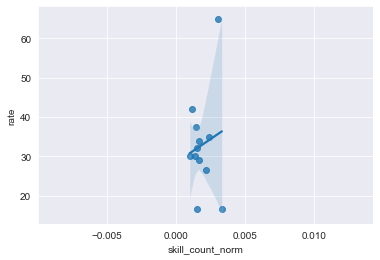

In [110]:
# How does this relate to wages? 
sns.regplot(x="skill_count_norm", y="rate", data=unique_skill_category)

In [111]:
unique_skill_category.sort_values(by='skill_count_norm',ascending=False)

,category_1,unique_skills,num_projects,skill_count,rate,skill_count_norm
9,Customer Service,1716,13095,5.743948,16.5,0.003347
11,Legal,1099,5883,3.342172,65.0,0.003041
8,Accounting & Consulting,1998,19407,4.779255,35.0,0.002392
10,Translation,1471,23545,3.238564,26.5,0.002202
7,Engineering & Architecture,2282,21304,3.883261,34.0,0.001702
4,Sales & Marketing,2961,124417,4.992228,29.0,0.001686
5,Writing,2833,66344,4.473607,32.0,0.001579
1,Admin Support,3146,71147,4.917242,16.5,0.001563
6,Data Science & Analytics,2503,23111,3.613388,37.5,0.001444
2,Design & Creative,3120,115262,4.343582,30.0,0.001392


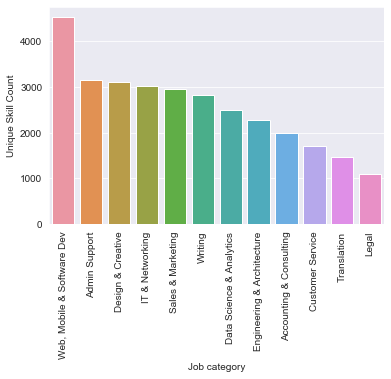

In [114]:
sns.set_style("darkgrid")
chart = sns.barplot(x="category_1", y="unique_skills", data=unique_skill_category)
chart.set_xticklabels(rotation=90, labels=unique_skill_category.category_1)
chart.set_xlabel('Job category')
chart.set_ylabel('Unique Skill Count')
#plt.savefig('unique_skill_category1.png',dpi=300,bbox_inches = "tight")

Text(0, 0.5, 'Normalized Unique Skill Count')

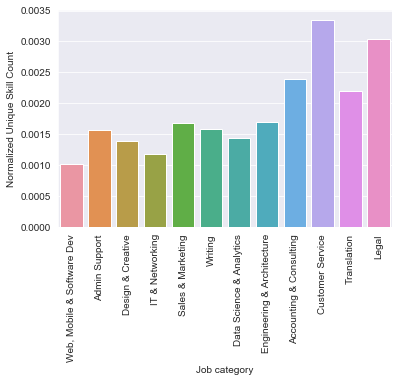

In [117]:
# normalized
chart = sns.barplot(x="category_1", y="skill_count_norm", data=unique_skill_category)
chart.set_xticklabels(rotation=90, labels=unique_skill_category.category_1)
chart.set_xlabel('Job category')
chart.set_ylabel('Normalized Unique Skill Count')
#plt.savefig('unique_skill_category1_norm.png',dpi=300,bbox_inches = "tight")

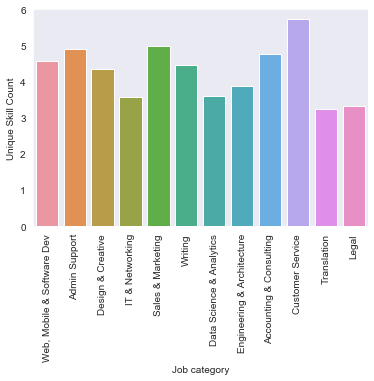

In [168]:
# not normalized
chart = sns.barplot(x="category_1", y="skill_count", data=unique_skill_category)
chart.set_xticklabels(rotation=90, labels=unique_skill_category.category_1)
chart.set_xlabel('Job category')
chart.set_ylabel('Unique Skill Count')
plt.savefig('unique_skill_category1.png',dpi=300,bbox_inches = "tight")

### Monthly average of skills (project mean)

In [119]:
# get data: merge unique_skill_cat with df
df = df.merge(unique_skill_cat, on='category_1')

In [120]:
# create month and quarter column
df['month_year'] = pd.to_datetime(df['date_3']).dt.to_period('M')
df['month_year'] = df['month_year'].values.astype(str)
df['quarter_year'] = pd.to_datetime(df['date_3']).dt.to_period('Q')
df['quarter_year'] = df['quarter_year'].values.astype(str)

## Skill level

### Monthly

In [122]:
# skill count over time

monthly = df.groupby(['skill_level','month_year'],as_index=False) \
       .agg({'date_3':'size',"skill_count":"mean"}) \
       .rename(columns={'date_3':'count', 'skill_count':'mean_skill_count'})
#monthly.head(10)

Text(0, 0.5, 'Mean skill count')

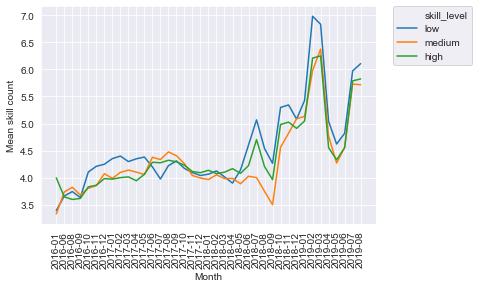

In [123]:
ax = sns.lineplot(x='month_year', y='mean_skill_count', hue='skill_level', hue_order = ["low","medium","high"],
             data=monthly[monthly["count"] > 5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=monthly.month_year)
plt.xlabel("Month")
plt.ylabel("Mean skill count")
#plt.savefig('wage_by_category.png',dpi=300,bbox_inches = "tight")

### Quarterly

In [159]:
# skill count over time

monthly = df.groupby(['skill_level','quarter_year'],as_index=False) \
       .agg({'date_3':'size',"skill_count":"mean"}) \
       .rename(columns={'date_3':'count', 'skill_count':'mean_skill_count'})
#monthly.head(10)

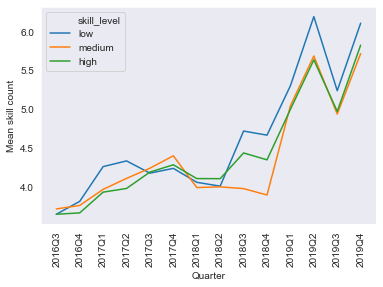

In [162]:
sns.set_style("dark")
ax = sns.lineplot(x='quarter_year', y='mean_skill_count', hue='skill_level', hue_order = ["low","medium","high"],
             data=monthly[monthly["count"] > 5])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=monthly[monthly["count"] > 5].quarter_year)
plt.xlabel("Quarter")
plt.ylabel("Mean skill count")
plt.savefig('A_skill_count_sklevel.png',dpi=300,bbox_inches = "tight")

### Job category

#### Monthly

In [87]:
# skill count over time
monthly = df.groupby(['category_1','month_year'],as_index=False) \
       .agg({'date_3':'size',"skill_count":"mean"}) \
       .rename(columns={'date_3':'count', 'skill_count':'mean_skill_count'})

In [105]:
test = monthly[monthly["count"] > 1]

Text(0, 0.5, 'Mean skill count')

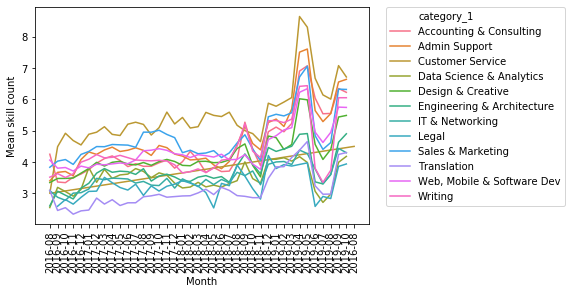

In [106]:
ax = sns.lineplot(x='month_year', y='mean_skill_count', hue='category_1', 
             data=test)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=test.month_year)
plt.xlabel("Month")
plt.ylabel("Mean skill count")
#plt.savefig('wage_by_category.png',dpi=300,bbox_inches = "tight")

#### Quarterly

In [163]:
# skill count over time

monthly = df.groupby(['category_1','quarter_year'],as_index=False) \
       .agg({'date_3':'size',"skill_count":"mean"}) \
       .rename(columns={'date_3':'count', 'skill_count':'mean_skill_count'})
#monthly.head(10)

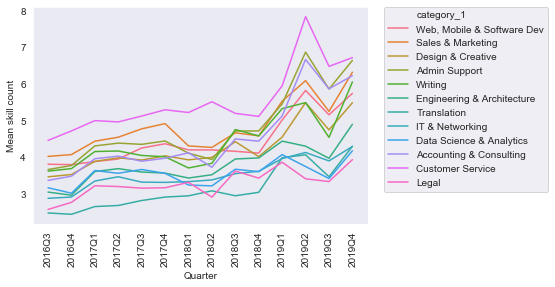

In [165]:
ax = sns.lineplot(x='quarter_year', y='mean_skill_count', hue='category_1', 
             data=monthly[monthly["count"] > 5].sort_values(by='count',ascending=False))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=monthly[monthly["count"] > 5].quarter_year)
plt.xlabel("Quarter")
plt.ylabel("Mean skill count")
plt.savefig('A_skill_count_cat.png',dpi=300,bbox_inches = "tight")

## Weighted skill count

#### Monthly

In [132]:
# create weighted skill count
df["weighted_skill_count"] = df.skill_count / df.unique_skills

In [133]:
# skill count over time

monthly = df.groupby(['skill_level','month_year'],as_index=False) \
       .agg({'date_3':'size',"weighted_skill_count":"mean"}) \
       .rename(columns={'date_3':'count', 'weighted_skill_count':'mean_skill_count_weighted'})
monthly.head(10)

,skill_level,month_year,count,mean_skill_count_weighted
0,high,2016-01,1,0.002002
1,high,2016-06,1,0.003504
2,high,2016-08,180,0.001069
3,high,2016-09,5346,0.001020
4,high,2016-10,4565,0.000992
5,high,2016-11,4021,0.001009
6,high,2016-12,3719,0.001076
7,high,2017-01,4539,0.001110
8,high,2017-02,5434,0.001150
9,high,2017-03,4209,0.001191


Text(0, 0.5, 'Weighted mean skill count')

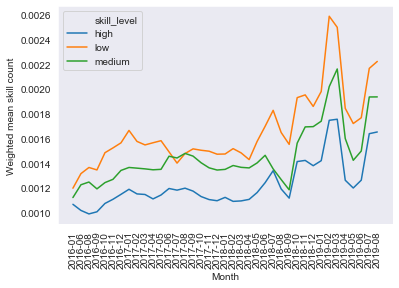

In [135]:
ax = sns.lineplot(x='month_year', y='mean_skill_count_weighted', hue='skill_level', 
             data=monthly[monthly["count"] > 10])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=monthly.month_year)
plt.xlabel("Month")
plt.ylabel("Weighted mean skill count")
#plt.savefig('wage_by_category.png',dpi=300,bbox_inches = "tight")

#### Quarterly

In [152]:
# skill count over time

monthly = df.groupby(['skill_level','quarter_year'],as_index=False) \
       .agg({'date_3':'size',"weighted_skill_count":"mean"}) \
       .rename(columns={'date_3':'count', 'weighted_skill_count':'mean_skill_count_weighted'})
#monthly.head(10)

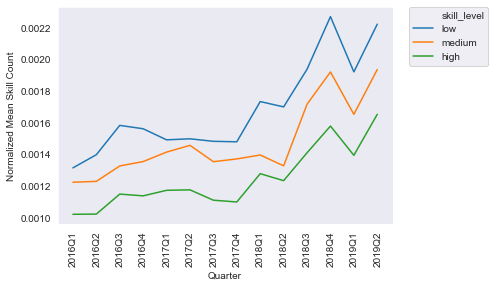

In [154]:
ax = sns.lineplot(x='quarter_year', y='mean_skill_count_weighted', hue='skill_level', hue_order = ["low","medium","high"],
             data=monthly[monthly["count"] > 5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=monthly.quarter_year)
plt.xlabel("Quarter")
plt.ylabel("Normalized Mean Skill Count")
plt.savefig('time_norm_skill_level.png',dpi=300,bbox_inches = "tight")

## Weighted Quarterly for job categories

In [150]:
# skill count over time

monthly = df.groupby(['category_1','quarter_year'],as_index=False) \
       .agg({'date_3':'size',"weighted_skill_count":"mean"}) \
       .rename(columns={'date_3':'count', 'weighted_skill_count':'mean_skill_count_weighted'})
#monthly.head(10)

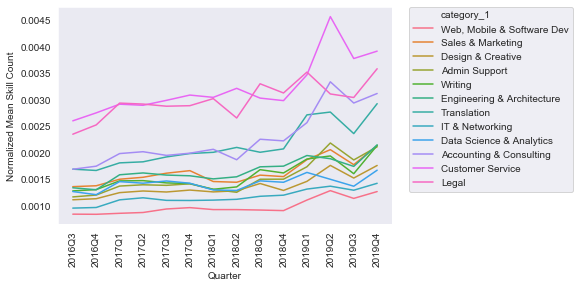

In [151]:
ax = sns.lineplot(x='quarter_year', y='mean_skill_count_weighted', hue='category_1', 
             data=monthly[monthly["count"] > 5].sort_values(by='count',ascending=False))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=monthly[monthly["count"] > 5].quarter_year)
plt.xlabel("Quarter")
plt.ylabel("Normalized Mean Skill Count")
#plt.savefig('time_norm_skill_category.png',dpi=300,bbox_inches = "tight")

### Different weighting system (standard deviation)

In [83]:
df[['skill_count','skill_level']].groupby('skill_level').std()

,skill_count
skill_level,
high,3.438543
low,3.696059
medium,3.483918


In [84]:
df[['skill_count','skill_level']].groupby('skill_level').mean()

,skill_count
skill_level,
high,4.532757
low,4.741931
medium,4.515382
